In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#CARGAMOS LOS DATASETS A USAR
reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv").copy()
orders = pd.read_csv("datasets/olist_orders_dataset.csv").copy()
customers = pd.read_csv('datasets/olist_customers_dataset.csv').copy()


In [45]:
# VISUALIZAMOS INFORMACION DE CADA SET
print("Informacion sobre las REVIEWS:")
reviews.info()
print("\nInformacion sobre las ORDERS:")
orders.info()
print("\nInformacion sobre los CUSTOMERS:")
customers.info()

Informacion sobre las REVIEWS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Informacion sobre las ORDERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id  

In [53]:
df = customers.merge(orders, on= 'customer_id', how='inner') \
    .merge(reviews, on='order_id', how='inner')

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99224 non-null  object
 1   customer_unique_id             99224 non-null  object
 2   customer_zip_code_prefix       99224 non-null  int64 
 3   customer_city                  99224 non-null  object
 4   customer_state                 99224 non-null  object
 5   order_id                       99224 non-null  object
 6   order_status                   99224 non-null  object
 7   order_purchase_timestamp       99224 non-null  object
 8   order_approved_at              99068 non-null  object
 9   order_delivered_carrier_date   97468 non-null  object
 10  order_delivered_customer_date  96359 non-null  object
 11  order_estimated_delivery_date  99224 non-null  object
 12  review_id                      99224 non-null  object
 13  r

In [55]:
df = df.drop(columns=["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","customer_zip_code_prefix"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99224 non-null  object
 1   customer_unique_id        99224 non-null  object
 2   customer_city             99224 non-null  object
 3   customer_state            99224 non-null  object
 4   order_id                  99224 non-null  object
 5   order_status              99224 non-null  object
 6   order_purchase_timestamp  99224 non-null  object
 7   review_id                 99224 non-null  object
 8   review_score              99224 non-null  int64 
 9   review_comment_title      11568 non-null  object
 10  review_comment_message    40977 non-null  object
 11  review_creation_date      99224 non-null  object
 12  review_answer_timestamp   99224 non-null  object
dtypes: int64(1), object(12)
memory usage: 9.8+ MB


In [58]:
# TRANSFORMAMOS A DATETIME LAS FECHAS
for col in ['review_creation_date','review_answer_timestamp','order_purchase_timestamp']:
    df[col] = pd.to_datetime(df[col])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               99224 non-null  object        
 1   customer_unique_id        99224 non-null  object        
 2   customer_city             99224 non-null  object        
 3   customer_state            99224 non-null  object        
 4   order_id                  99224 non-null  object        
 5   order_status              99224 non-null  object        
 6   order_purchase_timestamp  99224 non-null  datetime64[ns]
 7   review_id                 99224 non-null  object        
 8   review_score              99224 non-null  int64         
 9   review_comment_title      11568 non-null  object        
 10  review_comment_message    40977 non-null  object        
 11  review_creation_date      99224 non-null  datetime64[ns]
 12  review_answer_time

In [63]:
df['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
47c1a3033b8b77b3ab6e109eb4d5fdf3     7
b4e4f24de1e8725b74e4a1f4975116ed     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
9449a18f38a903c92c31b474162fdfd6     1
4cd767976e7592a9bd329d555f9d0aa6     1
72d4fd70a94058aa1a68e0dc49dc8b68     1
b4d118acd4783596a83a349bfc1e483c     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 95380, dtype: int64

# Calculamos Promedio del review_score

In [95]:
# GUARDA SOLO LAS FILAS QUE POSEAN REVIEW_SCORE ENTRE [1,2]
low_score_review = df[df['review_score'] <= 2]

In [96]:
low_score_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14575 entries, 20 to 99221
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               14575 non-null  object        
 1   customer_unique_id        14575 non-null  object        
 2   customer_city             14575 non-null  object        
 3   customer_state            14575 non-null  object        
 4   order_id                  14575 non-null  object        
 5   order_status              14575 non-null  object        
 6   order_purchase_timestamp  14575 non-null  datetime64[ns]
 7   review_id                 14575 non-null  object        
 8   review_score              14575 non-null  int64         
 9   review_comment_title      2351 non-null   object        
 10  review_comment_message    10890 non-null  object        
 11  review_creation_date      14575 non-null  datetime64[ns]
 12  review_answer_timestam

In [115]:
df['last_purchase_date'] = df.groupby("customer_unique_id")['order_purchase_timestamp'].transform('max')

In [169]:
df['is_low_review'] = (df['review_score'] <= 2).astype(int)
df['n_low_reviews'] = df.groupby("customer_unique_id")["is_low_review"].transform('sum')

In [171]:
df.sort_values('review_score')

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,last_purchase_date,days_since_last_purchase,Churn,is_low_review,n_low_reviews
35153,4cc8f93215f8f609b50638d49aea3077,790cf712a170a418cac0dc0cf3554980,sao goncalo,RJ,47c195b6b404c1fa22f04b99a37a0b29,delivered,2018-06-27 07:35:53,ce6815c6580be69f027fead18cc03205,1,NaN,Ainda não recebi o produto e não consigo entra...,2018-08-02,2018-08-02 17:33:23,2018-06-27 07:35:53,112,0,1,1
79313,d2fda415c994bc0421fe0759b3bed457,f7513c00225c1f2168260de9ef63e1bc,rio de janeiro,RJ,2c18f34c7f29606619d5ad1f14849efc,shipped,2018-01-21 15:28:34,4d7293ad5e15209e5caccd76f22b1422,1,NaN,Preciso de uma posição sobre o produto ou quer...,2018-02-21,2018-02-23 19:39:05,2018-01-21 15:28:34,269,1,1,1
52845,0ab5ac09913dfd3f247c7929a3799799,af5454198a97379394cacf676e1e96cb,registro,SP,cfdfd7862e532c4ec1ed1c6a1b56d320,canceled,2018-09-03 18:45:34,4548534449b1f572e357211b90724f1b,1,NaN,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54,2018-10-03 18:55:29,13,0,1,3
79304,7d256faf9786f86ad032ffdc9554ea2d,93c25a6ad8dd65c386a6b1093b7dc642,lages,SC,309b9de8813533826a3005f94bee92b9,delivered,2018-04-24 14:31:39,78041f98160d0e09e59bbb6d126dc80e,1,não recebi ainda,não recebi,2018-05-05,2018-05-07 22:10:22,2018-04-24 14:31:39,176,1,1,1
10874,1e51b91a1bb6df445cc3a0295863e235,819c6555091e32518b25fc90fee43660,itacoatiara,AM,a3c1d266558d811517afe798d1fad42c,delivered,2018-02-26 17:54:40,20cf6f5fdd2424c1d29f2be01e4a4694,1,NaN,"Foram comprados dois produtos, na nota fiscal ...",2018-04-14,2018-04-15 12:26:33,2018-02-26 17:54:40,232,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57731,97862b5094f2c4333b42a6d9e44f9a6d,e247db03443f737b4a5bbcb73257cdd1,sao paulo,SP,6b42a19086fbc8038a2a8e561a47a897,delivered,2018-01-16 14:18:11,0ed7682fd9fb72d5571fd8045df94c5f,5,NaN,Muito bom para compras,2018-01-20,2018-01-22 09:52:29,2018-01-16 14:18:11,274,0,0,0
22691,69e7113f19863b835b93d61d5cef84fe,031b6bf06cc2c9391a8a403cef221a1a,rio de janeiro,RJ,13c0912d87323337b72e40da4eea8e7a,delivered,2017-05-18 18:36:43,da9102469ed4dae312b0c58b7c1c0c2b,5,NaN,"O produto chegou muito rápido, em ótimo estado...",2017-05-24,2017-05-25 15:19:46,2017-05-18 18:36:43,516,0,0,0
57733,02bb19e4d66682ddf2b4ec648db0cd48,6166aa4c9d5b8c7315782b6ba4be6bc8,ponta grossa,PR,8be0775a20e013586ff9da7cef067d7b,delivered,2018-07-17 15:27:59,f0538f0a5d6950b8b84e050e1a73da06,5,NaN,NaN,2018-07-31,2018-07-31 21:07:13,2018-07-17 15:27:59,92,0,0,0
57721,ab2ad851c8afe2151aabdc9829cc23c8,5a7082176cc91600f28d5f844409f38d,caucaia,CE,59682ddba24feb11071cee1f0ed1ecd9,delivered,2017-12-06 18:00:29,1a13b52bddbe460610aa3170b91b3b5a,5,NaN,"É uma loja excelente, entrega antes do prazo e...",2017-12-19,2017-12-21 13:38:33,2017-12-06 18:00:29,314,0,0,0


In [196]:
# DE LOS QUE DIERON UN SCORE BAJO DETERMINAREMOS EL TARGET, MIDIENDO EL TIEMPO QUE PASO DESDE LA ULTIMA COMPRA 
ultima_fecha = df["order_purchase_timestamp"].max()
df['days_since_last_purchase'] = (ultima_fecha - df['last_purchase_date']).dt.days
df['Churn'] = ((df['days_since_last_purchase'] > 200)).astype(int)

In [197]:
df['Churn'].value_counts(normalize=True)

Churn
1    0.660717
0    0.339283
Name: proportion, dtype: float64

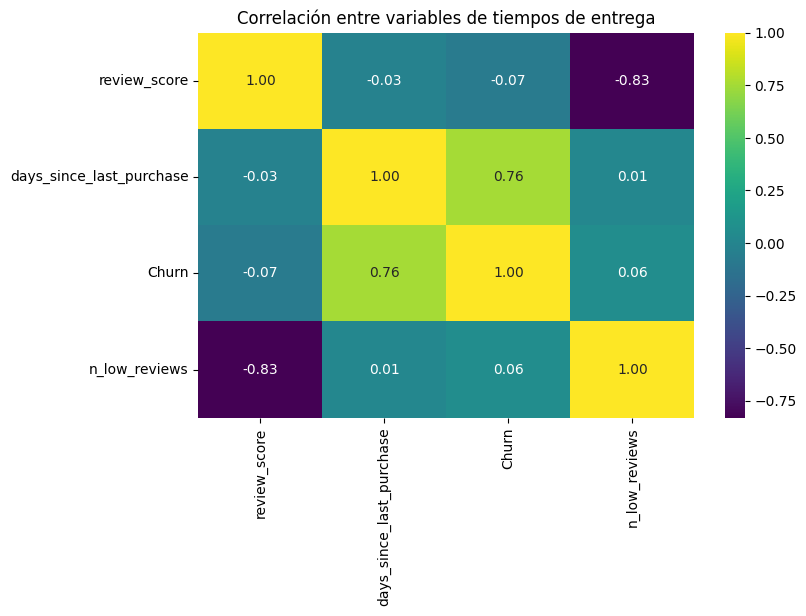

In [198]:
# Se crea un gráfico de correlaciones para ver que tan relacionadas estan las Features creadas con nuestro Target
features = ['review_score','days_since_last_purchase','Churn','n_low_reviews']
corr = df[features].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlación entre variables de tiempos de entrega")
plt.show()

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [200]:
features = ["review_score", "n_low_reviews"]
target = "Churn"

X = df[features]
y = df[target]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [202]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

In [203]:
y_pred = rf.predict(X_test)
print("📊 Reporte de clasificación:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

📊 Reporte de clasificación:

Accuracy: 0.507734945830184
              precision    recall  f1-score   support

           0       0.37      0.62      0.46      6733
           1       0.70      0.45      0.55     13112

    accuracy                           0.51     19845
   macro avg       0.53      0.54      0.50     19845
weighted avg       0.59      0.51      0.52     19845



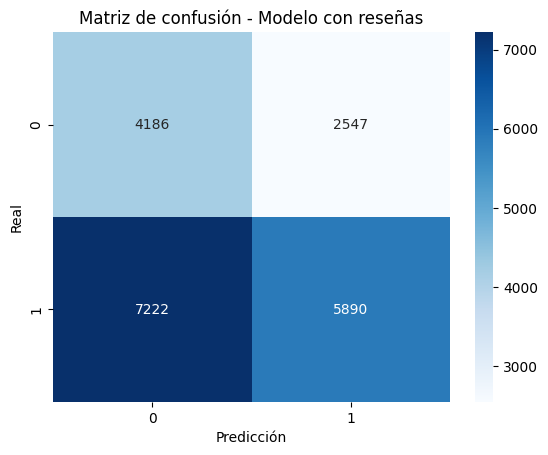

In [204]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Modelo con reseñas")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


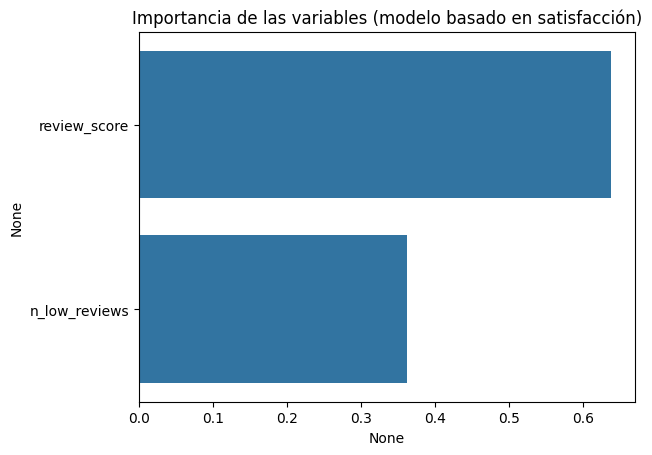

In [183]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.title("Importancia de las variables (modelo basado en satisfacción)")
plt.show()

In [191]:
# Entrenar el modelo con Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [192]:
# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4775510204081633

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.64      0.34      4245
           1       0.82      0.43      0.57     15600

    accuracy                           0.48     19845
   macro avg       0.53      0.54      0.45     19845
weighted avg       0.69      0.48      0.52     19845



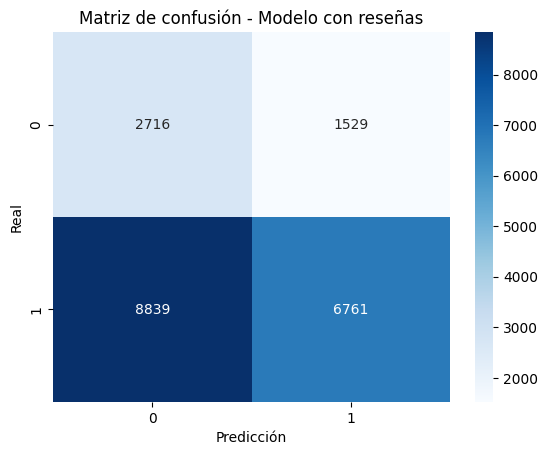

In [193]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Modelo con reseñas")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
